## 일요일만 제외한 분석

In [4]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [5]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [6]:
all= pd.read_csv('all.csv')

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  119 non-null    object
 1   CNT          119 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


### 일요일 제거

In [9]:
all=all.drop([118,72,73,74,60,112,105,98,91,78,71,64,57,50,43,36,1,8,15,22,29])

In [10]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 117
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  98 non-null     object
 1   CNT          98 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


### TEST해보기 위해 train세트와 test세트로 분활

In [11]:
train=all[(all['ACCOUNTDATE']>='2018-01-02')&(all['ACCOUNTDATE']<='2018-03-30')]
test=all[(all['ACCOUNTDATE']>='2018-04-02')&(all['ACCOUNTDATE']<='2018-04-30')]

In [103]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

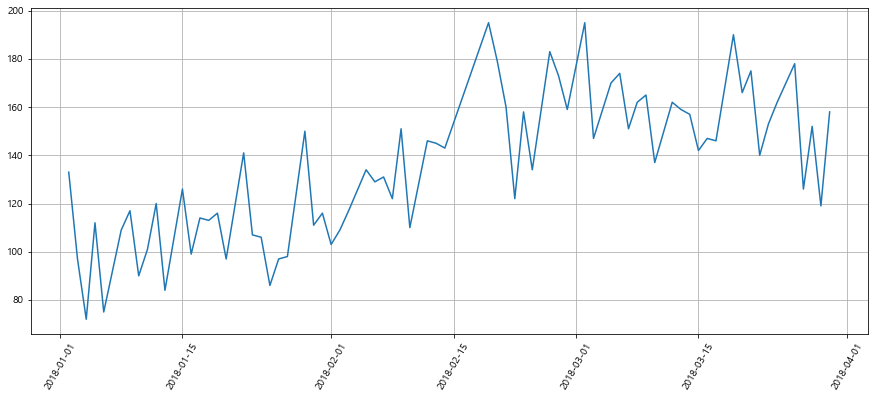

In [104]:
fig = plt.figure(figsize=(15, 6)) 
plt.plot(train)
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [105]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller
y = train['CNT']
y_1diff = train.diff().dropna()['CNT']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -0.183
원 데이터 p-value: 0.940
1차 차분 ADF Statistic: -8.442
1차 차분 p-value: 0.000


In [106]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [107]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 696.5756407182114
(0, 0, 1) 683.0839683953899
(0, 0, 2) 655.2405598826776
(0, 0, 3) 652.2366606231027
(0, 0, 4) 653.9862119062412
(0, 1, 0) 671.2958487965982
(0, 1, 1) 634.3903534131218
(0, 1, 2) 635.761849864311
(0, 1, 3) 631.5011714502596
(0, 1, 4) 632.4379934537526
(0, 2, 0) 741.7393162258302
(0, 2, 1) 669.1263929380135
(0, 2, 2) 634.8383463643452
(0, 2, 3) 636.3651236946985
(0, 2, 4) 632.8614514008408
(1, 0, 0) 666.5060817613265
(1, 0, 1) 646.3309447073508
(1, 0, 2) 647.3479112800547
(1, 0, 3) 1159.7146701483339
(1, 0, 4) 644.080162563553
(1, 1, 0) 643.6373987326592
(1, 1, 1) 635.5855982418257
(1, 1, 2) 634.5142900838953
(1, 1, 3) 636.4859775404127
(1, 1, 4) 635.5025864292784
(1, 2, 0) 684.7922895219479
(1, 2, 1) 642.8283706437526
(1, 2, 2) 635.9324546873854
(1, 2, 3) 635.0097723589056
(2, 0, 0) 649.6975394840615
(2, 0, 1) 647.080183015971
(2, 0, 2) 646.0886516551666
(2, 0, 3) 647.9624255614054
(2, 0, 4) 649.0622697211805
(2, 1, 0) 642.8673152494201
(2, 1, 1) 638.11942072

In [108]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [109]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [110]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=1, ma=3)파라미터로 arima모델을 학습
model=ARIMA(train['CNT'], order=(4,1,4))
model_fit=model.fit(trend='c',full_output=True,disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   71
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -305.556
Method:                       css-mle   S.D. of innovations             17.120
Date:                Wed, 03 Nov 2021   AIC                            631.112
Time:                        10:49:23   BIC                            653.739
Sample:                             1   HQIC                           640.110
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6195      0.630     -0.984      0.325      -1.853       0.614
ar.L1.D.CNT     0.4621      0.705      0.656      0.512      -0.919       1.843
ar.L2.D.CNT    -0.5651      0.261     -2.165    

<AxesSubplot:xlabel='ACCOUNTDATE'>

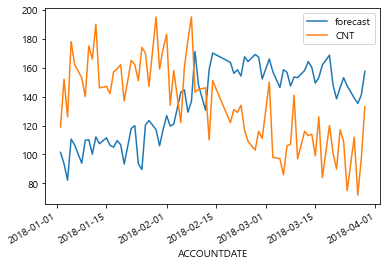

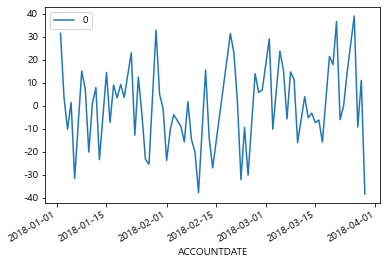

In [111]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [121]:
forecast_data=model_fit.forecast(steps=25) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

In [122]:
pred_y 

[100.59318368957872,
 106.45056937819628,
 90.1678029618556,
 88.47990835137549,
 100.7283398314632,
 102.70441859628033,
 97.33453937937729,
 95.88205105482777,
 96.8400191999907,
 96.15845711622309,
 94.91193903156342,
 94.45392811176241,
 94.09442861386788,
 93.37729949688183,
 92.66192507886082,
 92.09239736976248,
 91.50385766331559,
 90.85982081246739,
 90.23157368160741,
 89.623551009199,
 89.00608526049186,
 88.38165176342729,
 87.76205463450594,
 87.14463325563982,
 86.52494272791525]

In [123]:
test_y

array([223, 130, 183, 169, 169, 169, 209, 111, 184, 166, 163, 156, 201,
       119, 139, 133, 175, 198, 190, 138, 149, 155, 173, 175, 168],
      dtype=int64)

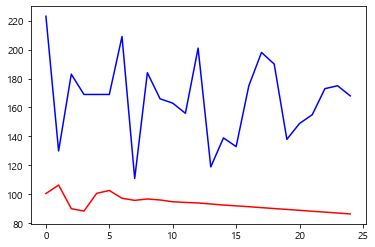

In [124]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값

# --------------------------------------------------------------------------------------------------------------

In [7]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [12]:
train.columns=['ds','y']
test.columns=['ds','y']

In [13]:
train['ds']= pd.to_datetime(train['ds'])

In [14]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [15]:
future_data = prophet.make_future_dataframe(periods = 25, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(25)

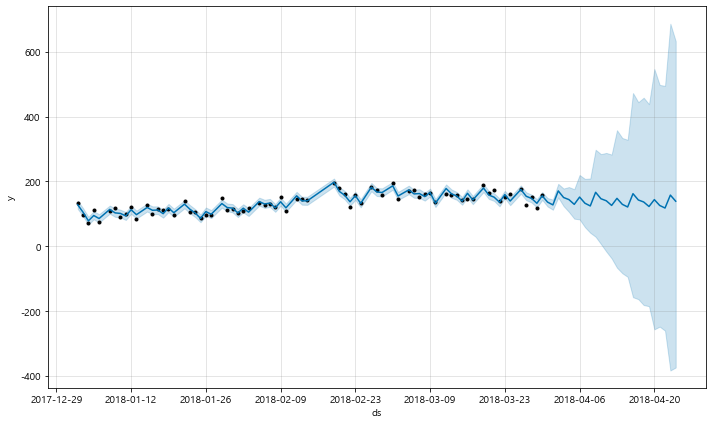

In [16]:
fig1=prophet.plot(forecast_data)

In [17]:
pred_y=a.yhat.values[0:25]
test_y=test.y.values[0:25]

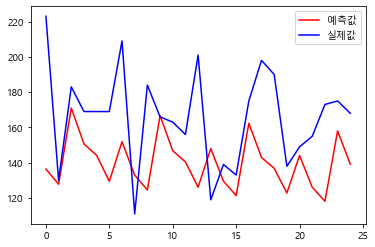

In [20]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)  #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

29.986176530194744

In [18]:
a=forecast_data[['ds','yhat']].tail(21)

In [21]:
a['ds']=a['ds'].astype('str')

In [22]:
a

,ds,yhat
76,2018-04-04,144.178127
77,2018-04-05,129.491514
78,2018-04-06,151.900692
79,2018-04-07,132.977437
80,2018-04-08,124.592602
81,2018-04-09,166.698051
82,2018-04-10,146.789097
83,2018-04-11,140.504914
84,2018-04-12,126.180419
85,2018-04-13,148.002355
